# Supervised Machine Learning algorithm for bidimensional variables

## Variables

$$ z=w_1 x_1+\cdots+w_m x_m=w^{\top} x+b $$ 
- - -
$$ w=\left[\begin{array}{c}
w_1 \\
\vdots \\
w_m
\end{array}\right] \quad x=\left[\begin{array}{c}
x_1 \\
\vdots \\
x_m
\end{array}\right]
$$
- - -
$$ \sigma(z)= \begin{cases}1 & \text { if } z \geqslant 0 \\ 0 & \text { else }\end{cases} $$

## Learning Algorithm

$$ y^{(i)}=\left[\begin{array}{c}
y^{(1)} \\
\vdots \\
y(i)
\end{array}\right] \quad \hat{y}^{(i)}=\left[\begin{array}{c}
y^{(1)} \\
\vdots \\
\hat{y}(i)
\end{array}\right] $$



$$ \begin{aligned}
& w_j:=w_j+\Delta w_j \\
& b:=b+\Delta b
\end{aligned} $$
- - -
$$ \begin{aligned}
& \Delta w_j=\eta\left(y^{(i)}-\hat{y}^{(i)}\right) x_j^{(i)} \\
& \Delta b=\eta\left(y^{(i)}-\hat{y}^{(i)}\right)
\end{aligned} $$

## Importing dependencies packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Implementation of the Perceptron

In [3]:
import numpy as np
class Perceptron: 
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta 
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = np.zeros(X.shape[1])
        self.b_ = float(0.)
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0) 
            self.errors_.append(errors)
        return self

    def net_input(self ,X):

        return np.dot(X, self.w_) + self.b_
    
    def predict(self, X): 

        return np.where(self.net_input(X) >= 0.0, 1, 0) 

## Connection to Iris Flower database in order to extract the characteristics

In [4]:
try:
    url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    df = pd.read_csv(url, header=None, encoding='utf-8')
    print('Succesfully connected to database')
except HTTPError:
    print('Failed Connection to Database')

df.tail()


Succesfully connected to database


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


## Extracting the characteristics and saving into a list in order to plot the data

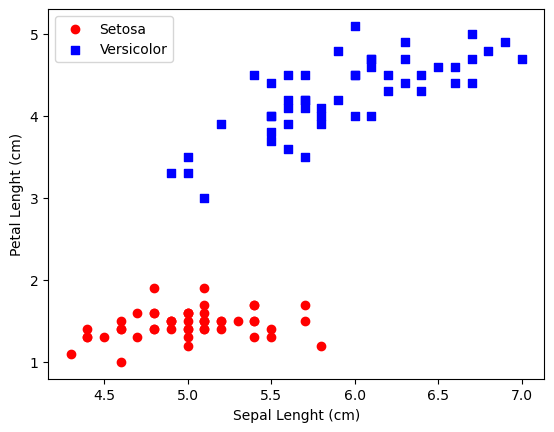

In [5]:
#Labell data and save it as a vector
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)
#Data Sample with bidimensional characteristics
X = df.iloc[0:100 , [0, 2]].values
#Plot data
plt.scatter(X[:50, 0], X[:50, 1],
        color='red', marker='o', label='Setosa', )
plt.scatter(X[50:100, 0], X[50:100, 1],
        color='blue', marker='s', label='Versicolor')
        
plt.xlabel('Sepal Lenght (cm)')
plt.ylabel('Petal Lenght (cm)')
plt.legend(loc= 'upper left')
plt.show()



## Model Training and error analysis plotting in order to observe the convergence of the algorithm

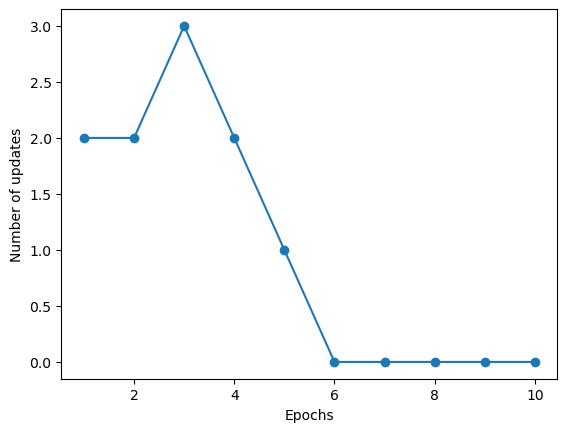

In [6]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), 
        ppn.errors_, marker='o')
plt.xlabel('Epochs') 
plt.ylabel('Number of updates')
plt.show()

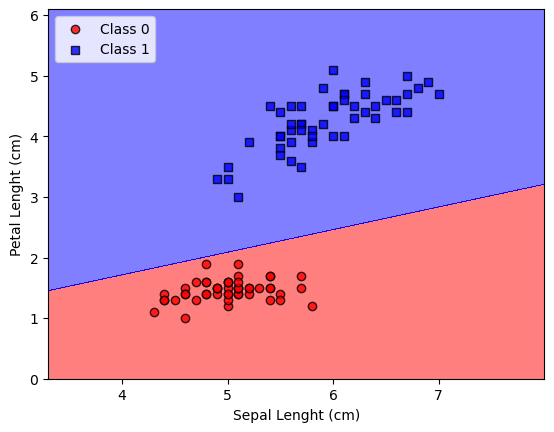

In [11]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.001):
    # color and marker setup
    markers = ('o', 's', '^', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.5, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for id, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[id],
                    marker=markers[id], label=f'Class {cl}',
                    edgecolor='black')
    


plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal Lenght (cm)')
plt.ylabel('Petal Lenght (cm)')
plt.legend(loc='upper left')
plt.show()
